# RNN

In [1]:
# 258 * 258
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn

example_img = Image.open('assets/Corgi.png')
example_img = np.array(example_img)

print(example_img.shape)

(429, 696, 3)


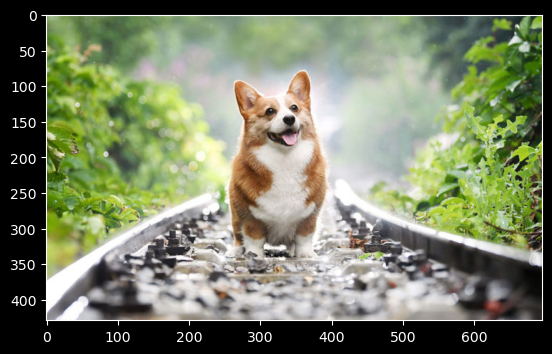

In [2]:
# plt.style.use('default')
plt.imshow(example_img)

In [3]:
example_img = example_img.reshape(1, -1)

print(example_img)

[[120 150  88 ...  43  39  38]]


In [4]:
class Model(nn.Module):
    def __init__(self, input_dimension, categorical):
        super(Model, self).__init__()
        self.linear = nn.Linear(in_features=input_dimension, out_features = categorical)
        self.softmax = nn.Softmax()

    def forward(self, x):
        predict = self.softmax(self.linear(x))
        
        return predict

In [5]:
train_x = torch.from_numpy(example_img)
print('shape:{}, \ntrain_x:{}'.format(train_x.shape, train_x))

shape:torch.Size([1, 895752]), 
train_x:tensor([[120, 150,  88,  ...,  43,  39,  38]], dtype=torch.uint8)


In [6]:
test_model = Model(input_dimension=train_x.shape[1], categorical=10)

In [7]:
output = test_model(train_x.float())

print(output)

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.6052e-45,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       grad_fn=<SoftmaxBackward0>)


/Users/du/miniforge3/envs/ml/lib/python3.10/site-packages/torch/nn/modules/module.py:1751: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [8]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(test_model.parameters(), lr=1e-3)

In [9]:
lable = np.random.randint(0,2,10)
train_y = torch.from_numpy(np.array([lable])).to(torch.float)
train_y

tensor([[0., 1., 0., 0., 0., 0., 1., 0., 1., 1.]])

In [10]:
loss_history = []
for t in range(100):
    y_true = train_y
    y_predict = test_model(train_x.float())

    loss = criterion(y_predict, y_true)
    loss_history.append(loss.detach().numpy())
    print(loss)
    # print(y_true.shape)
    # print(y_predict.shape)

/Users/du/miniforge3/envs/ml/lib/python3.10/site-packages/torch/nn/modules/module.py:1751: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<DivBackward1>)
tensor(9.8446, grad_fn=<D

In [11]:
def fib(n):
    if n == 0 or n == 1: return 1
    else:
        return fib(n-1) + fib(n-2)
    
def fac(n):
    if n == 0: return 1
    else: return n*fac(n-1)

for i in range(10): print('{}\t{}'.format(fib(i), fac(i)))

1	1
1	1
2	2
3	6
5	24
8	120
13	720
21	5040
34	40320
55	362880


In [12]:
class RNN(nn.Module):
    # implement RNN from scratch rather than ysubf nn.RNN
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_tensor, hidden_tensor):
        combined = torch.cat((input_tensor, hidden_tensor), 1)

        hidden = self.i2h(combined)
        output = self.i2o(combined)

    ...

...

rnn = 2

def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)



In [13]:
RNN(2,3,4)

RNN(
  (i2h): Linear(in_features=5, out_features=3, bias=True)
  (i2o): Linear(in_features=5, out_features=4, bias=True)
  (softmax): LogSoftmax(dim=1)
)